In [1]:
import pandas as pd
import pyam
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import aneris

In [2]:
results_21_path = '../../../data/SOD/model_results/to_share/model_results_to_share_Chapter_21.xlsx'
results_21_income_path = '../../../data/SOD/model_results/to_share/model_results_to_share_Chapter_21_Income.xlsx'

In [3]:
regions_chpt_21 = ['IMAGE 3.3|Canada',
            'IMAGE 3.3|Japan',
            'IMAGE 3.3|Mexico',
            'IMAGE 3.3|South Africa',
            'IMAGE 3.3|Turkey',
            'IMAGE 3.3|India',
            'IMAGE 3.3|Rest of Southern Africa',
            'IMAGE 3.3|Brazil',
            'IMAGE 3.3|China Region',
            'IMAGE 3.3|Eastern Africa',
            'IMAGE 3.3|Indonesia Region',
            'IMAGE 3.3|Northern Africa',
            'IMAGE 3.3|Rest of South Asia',
            'IMAGE 3.3|Russia Region',
            'IMAGE 3.3|USA',
            'IMAGE 3.3|Western Africa',
            'IMAGE 3.3|Western Europe',
            'IMAGE 3.3|Oceania',
            'World'],

In [4]:
def compute_3_groups_image(df, variables, weight=None):
    df_high_income = df.aggregate_region(variables,
                              region='High-Income',
                              subregions=[
                                'IMAGE 3.3|Canada',
                                'IMAGE 3.3|Japan',
                                'IMAGE 3.3|USA',
                                'IMAGE 3.3|Western Europe',
                                'IMAGE 3.3|Oceania'
                              ],
                              weight=weight
                              )

    df_middle_income = df.aggregate_region(variables,
                              region='Middle-Income',
                              subregions=[
                                'IMAGE 3.3|Mexico',
                                'IMAGE 3.3|South Africa',
                                'IMAGE 3.3|Turkey',
                                'IMAGE 3.3|Brazil',
                                'IMAGE 3.3|China Region',
                                'IMAGE 3.3|Indonesia Region',
                                'IMAGE 3.3|Russia Region',
                              ],
                              weight=weight
                              )

    df_low_income = df.aggregate_region(variables,
                              region='Low-Income',
                              subregions=[
                                'IMAGE 3.3|India',
                                'IMAGE 3.3|Rest of Southern Africa',
                                'IMAGE 3.3|Eastern Africa',
                                'IMAGE 3.3|Northern Africa',
                                'IMAGE 3.3|Rest of South Asia',
                                'IMAGE 3.3|Western Africa',
                              ],
                              weight=weight
                              )
    df_world = df.filter(region='World')
    df_3_groups = pyam.concat([df_high_income, df_middle_income, df_low_income, df_world])
    return df_3_groups

In [5]:
df_world = pd.read_excel(results_21_path)


scenario_rename_dict = {
    "REF": "Current Trends",
    "LIFE-TP": "Behaviour-focused",
    "TECH-TP": "Technology-focused",
    "REF-v2": "Current Trends",
    "LIFE-TP-v2": "Behaviour-focused",
    "TECH-TP-v2": "Technology-focused",
}


df_world = df_world[df_world['region']=='World'].reset_index(drop=True)
df_world = df_world.rename(columns={'topic':'model'})
df_world.scenario = df_world.scenario.replace(scenario_rename_dict)
# df_world = pyam.IamDataFrame(df_world)
df_world

,model,scenario,region,variable,unit,2010,2020,2030,2040,2050
0,Emissions,Behaviour-focused,World,Emissions|CO2,Mt CO2/yr,37900.00,40300.00,20400.00,4070.00,-3390.00
1,Emissions,Behaviour-focused,World,Emissions|Kyoto Gases,Mt CO2-equiv/yr,50800.00,55200.00,30700.00,11000.00,2090.00
2,Emissions,Current Trends,World,Emissions|CO2,Mt CO2/yr,NaN,40400.00,50900.00,55000.00,56500.00
3,Emissions,Current Trends,World,Emissions|Kyoto Gases,Mt CO2-equiv/yr,NaN,53600.00,67600.00,73900.00,77200.00
4,Emissions,Technology-focused,World,Emissions|CO2,Mt CO2/yr,37900.00,40100.00,22900.00,5400.00,-2350.00
5,Emissions,Technology-focused,World,Emissions|Kyoto Gases,Mt CO2-equiv/yr,50800.00,54900.00,33900.00,13400.00,4600.00
6,Energy,Behaviour-focused,World,Final Energy,EJ/yr,360.00,399.00,334.00,259.00,225.00
7,Energy,Behaviour-focused,World,Final Energy|Electricity,EJ/yr,60.80,76.00,77.00,87.80,98.80
8,Energy,Behaviour-focused,World,Primary Energy,EJ/yr,508.00,578.00,431.00,342.00,327.00
9,Energy,Behaviour-focused,World,Primary Energy|Biomass,EJ/yr,51.00,58.40,67.00,62.60,59.60


In [6]:
df_income = pyam.IamDataFrame(results_21_income_path)


df_income.divide("Food Demand|Crops",
                "Food Demand", 
                "Food Demand|Crops (Fraction)", 
                ignore_units=True, 
                append=True)
df_income.multiply("Food Demand|Crops (Fraction)", 
            100, 
            "Food Demand|Crops (Share)", 
            ignore_units='%', 
            append=True)

df_income.filter(variable='Primary*').timeseries()

[INFO] 12:29:14 - pyam.core: Reading file ..\..\..\data\SOD\model_results\to_share\model_results_to_share_Chapter_21_Income.xlsx


2010  \
model  scenario region                      variable                              unit            
Energy LIFE-TP  High-Income                 Primary Energy                        EJ/yr  185.00   
                                            Primary Energy|Biomass                EJ/yr   11.00   
                                            Primary Energy|Biomass|Traditional    EJ/yr    2.00   
                                            Primary Energy|Non-Biomass Renewables EJ/yr    5.58   
                High-Income, High Density   Primary Energy                        EJ/yr   78.60   
...                                                                                         ...   
       TECH-TP  Middle-Income, High Density Primary Energy|Non-Biomass Renewables EJ/yr    2.95   
                Middle-Income, Low Density  Primary Energy                        EJ/yr   54.10   
                                            Primary Energy|Biomass                EJ/yr    4.37   
                                            Primary Energy|Biomass|Traditional    EJ/yr    1.19   
                                            Primary Energy|Non-Biomass Renewables EJ/yr    2.29   

                                                                                           2020  \
model  scenario region                      variable                              unit            
Energy LIFE-TP  High-Income                 Primary Energy                        EJ/yr  168.00   
                                            Primary Energy|Biomass                EJ/yr   12.20   
                                            Primary Energy|Biomass|Traditional    EJ/yr    2.26   
                                            Primary Energy|Non-Biomass Renewables EJ/yr    9.40   
                High-Income, High Density   Primary Energy                        EJ/yr   70.10   
...                                                                                         ...   
       TECH-TP  Middle-Income, High Density Primary Energy|Non-Biomass Renewables EJ/yr    7.36   
                Middle-Income, Low Density  Primary Energy                        EJ/yr   58.70   
                                            Primary Energy|Biomass                EJ/yr    4.49   
                                            Primary Energy|Biomass|Traditional    EJ/yr    1.20   
                                            Primary Energy|Non-Biomass Renewables EJ/yr    2.70   

                                                                                           2025  \
model  scenario region                      variable                              unit            
Energy LIFE-TP  High-Income                 Primary Energy                        EJ/yr  143.00   
                                            Primary Energy|Biomass                EJ/yr   12.80   
                                            Primary Energy|Biomass|Traditional    EJ/yr    1.52   
                                            Primary Energy|Non-Biomass Renewables EJ/yr   10.50   
                High-Income, High Density   Primary Energy                        EJ/yr   58.90   
...                                                                                         ...   
       TECH-TP  Middle-Income, High Density Primary Energy|Non-Biomass Renewables EJ/yr    8.79   
                Middle-Income, Low Density  Primary Energy                        EJ/yr   51.70   
                                            Primary Energy|Biomass                EJ/yr    4.38   
                                            Primary Energy|Biomass|Traditional    EJ/yr    1.01   
                                            Primary Energy|Non-Biomass Renewables EJ/yr    2.93   

                                                                                            2030  \
model  scenario region                      variable                              unit             
Energy LIFE-TP  High-Income

In [7]:
df_income.rename(scenario=scenario_rename_dict, inplace=True)

df_income = df_income.timeseries().reset_index()
df_income = pd.concat([df_world, df_income])
df_income.model.replace({
    'Emissions':'chpt_21', 
    'Energy':'chpt_21', 
    'Food':'chpt_21', 
    'Land':'chpt_21', 
    'Macro_Economy':'chpt_21'
}, inplace=True)

ratio_mask = df_income['unit'] == '%'
# Apply rounding to the 'value' column for rows where the 'unit' column is '%'
df_income.loc[ratio_mask, df_income.columns[5:]] = round(df_income.loc[ratio_mask, df_income.columns[5:]])

df_income = pyam.IamDataFrame(df_income)
df_income = df_income.filter(region=['High-Income', 'Middle-Income', 'Low-Income', 'World'], 
                                                year=[2010, 2020, 2050])


df_income.subtract('Primary Energy|Biomass', "Primary Energy|Biomass|Traditional", 'Primary Energy|Biomass|Modern', append=True)
df_income.aggregate("Primary Energy|Renewables", ["Primary Energy|Non-Biomass Renewables",  'Primary Energy|Biomass|Modern'], append=True)

df_income.divide("Primary Energy|Renewables",
                "Primary Energy", 
                "Primary Energy|Renewables (Fraction)", 
                ignore_units=True, 
                append=True)
df_income.multiply("Primary Energy|Renewables (Fraction)", 
            100, 
            "Primary Energy|Renewables (Share)", 
            ignore_units='%', 
            append=True)


# df_income = df_income.filter(variable='Food Demand', keep=False)
df_income.filter(variable='Primary Energy|Renewables (Share)').timeseries()

C:\Users\maycocks\AppData\Local\Temp\2\ipykernel_11124\2693849178.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_income.model.replace({


2010  \
model   scenario           region        variable                          unit             
chpt_21 Behaviour-focused  High-Income   Primary Energy|Renewables (Share) %     7.881081   
                           Low-Income    Primary Energy|Renewables (Share) %     5.090909   
                           Middle-Income Primary Energy|Renewables (Share) %     5.450867   
                           World         Primary Energy|Renewables (Share) %     6.043307   
        Current Trends     High-Income   Primary Energy|Renewables (Share) %          NaN   
                           Low-Income    Primary Energy|Renewables (Share) %          NaN   
                           Middle-Income Primary Energy|Renewables (Share) %          NaN   
                           World         Primary Energy|Renewables (Share) %          NaN   
        Technology-focused High-Income   Primary Energy|Renewables (Share) %     7.881081   
                           Low-Income    Primary Energy|Renewables (Share) %     5.090909   
                           Middle-Income Primary Energy|Renewables (Share) %     5.450867   
                           World         Primary Energy|Renewables (Share) %     6.043307   

                                                                                      2020  \
model   scenario           region        variable                          unit              
chpt_21 Behaviour-focused  High-Income   Primary Energy|Renewables (Share) %     11.511905   
                           Low-Income    Primary Energy|Renewables (Share) %      5.071151   
                           Middle-Income Primary Energy|Renewables (Share) %      6.637168   
                           World         Primary Energy|Renewables (Share) %      7.612457   
        Current Trends     High-Income   Primary Energy|Renewables (Share) %     11.384615   
                           Low-Income    Primary Energy|Renewables (Share) %      4.812419   
                           Middle-Income Primary Energy|Renewables (Share) %      6.592920   
                           World         Primary Energy|Renewables (Share) %      7.547496   
        Technology-focused High-Income   Primary Energy|Renewables (Share) %     11.440476   
                           Low-Income    Primary Energy|Renewables (Share) %      5.077720   
                           Middle-Income Primary Energy|Renewables (Share) %      6.651786   
                           World         Primary Energy|Renewables (Share) %      7.608319   

                                                                                      2050  
model   scenario           region        variable                          unit             
chpt_21 Behaviour-focused  High-Income   Primary Energy|Renewables (Share) %     44.330109  
                           Low-Income    Primary Energy|Renewables (Share) %     65.188834  
                           Middle-Income Primary Energy|Renewables (Share) %     47.993043  
                           World         Primary Energy|Renewables (Share) %     48.987768  
        Current Trends     High-Income   Primary Energy|Renewables (Share) %     30.024020  
                           Low-Income    Primary Energy|Renewables (Share) %      8.969697  
                           Middle-Income Primary Energy|Renewables (Share) %     12.916058  
                           World         Primary Energy|Renewables (Share) %     15.392987  
        Technology-focused High-Income   Primary Energy|Renewables (Share) %     53.805660  
                           Low-Income    Primary Energy|Renewables (Share) %     59.918699  
                           Middle-Income Primary Energy|Renewables (Share) %     53.929714  
                           World         Primary Energy|Renewables (Share) %     53.633205

In [8]:
df_income.filter(region=['High-Income', 'Low-Income', 'Middle-income']).aggregate_region("Food Demand|Crops (Share)", weight='Population').timeseries()

2010  \
model   scenario           region variable                  unit              
chpt_21 Behaviour-focused  World  Food Demand|Crops (Share) %     86.107849   
        Current Trends     World  Food Demand|Crops (Share) %           NaN   
        Technology-focused World  Food Demand|Crops (Share) %     86.107849   

                                                                       2020  \
model   scenario           region variable                  unit              
chpt_21 Behaviour-focused  World  Food Demand|Crops (Share) %     85.025704   
        Current Trends     World  Food Demand|Crops (Share) %     85.025704   
        Technology-focused World  Food Demand|Crops (Share) %     85.025704   

                                                                       2050  
model   scenario           region variable                  unit             
chpt_21 Behaviour-focused  World  Food Demand|Crops (Share) %     89.419708  
        Current Trends     World  Food Demand|Crops (Share) %     84.452555  
        Technology-focused World  Food Demand|Crops (Share) %     85.678832

# Share renewable

C:\Users\maycocks\AppData\Local\Temp\2\ipykernel_11124\1634183923.py:65: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_result_markers['offset'] = df_result_markers['scenario'].map(scenario_offsets)


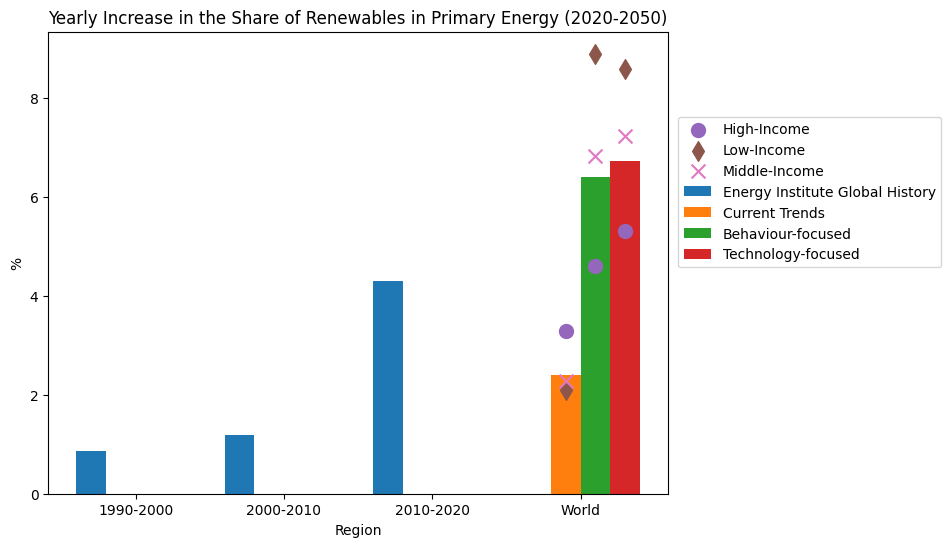

In [9]:
# Primary Energy
df_test = df_income.filter(variable='Primary Energy|Renewables (Share)')
df_2020 = df_test.filter(year=2020).timeseries()[2020]
df_2050 = df_test.filter(year=2050).timeseries()[2050]

# Divide the value of CO2 emissions in 2020 by that in 2010
df_result = abs(((df_2050/df_2020)**(1/30)-1)*100)
df_result = df_result.reset_index()
df_result.unit = '%'

# https://ourworldindata.org/renewable-energy
renewable_share_1990 = 7.18
renewable_share_2000 = 7.82
renewable_share_2010 = 8.80
renewable_share_2020 = 13.40

renewable_change_1990_2000  = round(((renewable_share_2000/renewable_share_1990)**(1/10)-1)*100, ndigits=2)
renewable_change_2000_2010  = round(((renewable_share_2010/renewable_share_2000)**(1/10)-1)*100, ndigits=2)
renewable_change_2010_2020  = round(((renewable_share_2020/renewable_share_2010)**(1/10)-1)*100, ndigits=2)

ei_hist_data = {
    'model':['chpt_21','chpt_21','chpt_21',],
    'scenario':['Energy Institute Global History', 'Energy Institute Global History', 'Energy Institute Global History',],
    'region':['1990-2000','2000-2010','2010-2020',],
    'variable':['Primary Energy|Renewables (Share)','Primary Energy|Renewables (Share)','Primary Energy|Renewables (Share)',],
    'unit':['%','%','%',],
    0:[renewable_change_1990_2000, renewable_change_2000_2010, renewable_change_2010_2020]
    }

df_result = pd.concat([df_result, pd.DataFrame.from_dict(ei_hist_data)])

df_result_bar = df_result[~df_result['region'].isin(['High-Income','Middle-Income','Low-Income'])]
df_result_markers = df_result[df_result['region'].isin(['High-Income','Middle-Income','Low-Income'])]

# Pivot the DataFrame to have regions as index, scenarios as columns, and '0' as values
df_pivot = df_result_bar.pivot(index='region', columns='scenario', values=0)
# df_pivot = df.pivot(index='region', columns='scenario', values='0')

# Create a bar plot
fig, ax = plt.subplots(figsize=(8, 6))

# Define bar width
bar_width = 0.2

# Define x-axis positions for regions
x = np.arange(len(df_pivot.index))  # number of regions

# Manually specify the order in which to plot the scenarios
# plot_order = ['Scenario2', 'Scenario1', 'Scenario3']
plot_order = ['Energy Institute Global History', 'Current Trends', "Behaviour-focused", "Technology-focused"]

for i, scenario in enumerate(plot_order):
    ax.bar(x + i * bar_width, df_pivot[scenario], width=bar_width, label=scenario)

# Add a single marker to the Scenario1 bar for 'World' region with value 5
world_index = df_pivot.index.get_loc('World')  # Get the index of 'World'
# scenario1_offset = 1 * bar_width  # Offset for Scenario1 (first bar group)
scenario_offsets = {
    'Current Trends': world_index + 1 * bar_width,
    'Behaviour-focused': world_index + 2 * bar_width,
    'Technology-focused': world_index + 3 * bar_width,
}

# Create a new column 'offset' in the DataFrame by mapping the 'scenario' column to the offsets
df_result_markers['offset'] = df_result_markers['scenario'].map(scenario_offsets)

marker_styles = {
    'High-Income': 'o',  # Circle marker for Region1
    'Low-Income': 'd',     # Square marker for World
    'Middle-Income':'x'
}
for region in df_result_markers['region'].unique():
    # Filter DataFrame by region
    region_data = df_result_markers[df_result_markers['region'] == region]
    
    # Scatter plot for each region with different marker styles
    ax.scatter(region_data['offset'], region_data[0], 
               label=region, marker=marker_styles[region], s=100)

# Add labels, title, and legend
ax.set_xlabel('Region')
ax.set_ylabel('%')

ax.set_title('Yearly Increase in the Share of Renewables in Primary Energy (2020-2050)')

# Set x-ticks to be in the middle of the group of bars
ax.set_xticks(x + bar_width * (len(df_pivot.columns) - 1) / 2)
ax.set_xticklabels(df_pivot.index)


fig.legend(bbox_to_anchor=(1.25, 0.75)) 

# Show the plot
plt.show()

In [10]:
df_result

,model,scenario,region,variable,unit,0
0,chpt_21,Behaviour-focused,High-Income,Primary Energy|Renewables (Share),%,4.596797
1,chpt_21,Behaviour-focused,Low-Income,Primary Energy|Renewables (Share),%,8.885209
2,chpt_21,Behaviour-focused,Middle-Income,Primary Energy|Renewables (Share),%,6.816870
3,chpt_21,Behaviour-focused,World,Primary Energy|Renewables (Share),%,6.402564
4,chpt_21,Current Trends,High-Income,Primary Energy|Renewables (Share),%,3.285260
5,chpt_21,Current Trends,Low-Income,Primary Energy|Renewables (Share),%,2.097195
6,chpt_21,Current Trends,Middle-Income,Primary Energy|Renewables (Share),%,2.266896
7,chpt_21,Current Trends,World,Primary Energy|Renewables (Share),%,2.404097
8,chpt_21,Technology-focused,High-Income,Primary Energy|Renewables (Share),%,5.296224
9,chpt_21,Technology-focused,Low-Income,Primary Energy|Renewables (Share),%,8.574987


# Energy intensity

C:\Users\maycocks\AppData\Local\Temp\2\ipykernel_11124\1258066345.py:57: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_result_markers['offset'] = df_result_markers['scenario'].map(scenario_offsets)


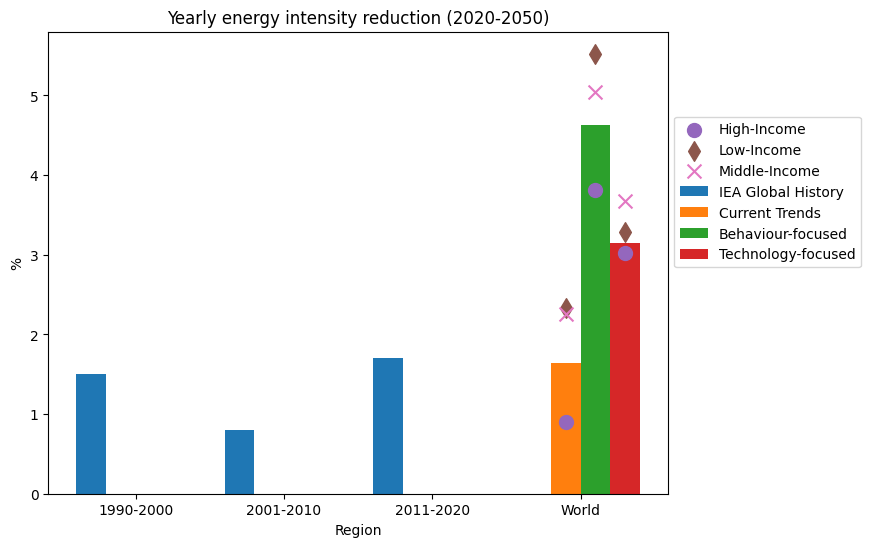

In [11]:
# Primary Energy
df_test = df_income.divide('Primary Energy', 'GDP|PPP', 'Energy Intensity')
df_2020 = df_test.filter(year=2020).timeseries()[2020]
df_2050 = df_test.filter(year=2050).timeseries()[2050]

# Divide the value of CO2 emissions in 2020 by that in 2010
df_result = abs(((df_2050/df_2020)**(1/30)-1)*100)
df_result = df_result.reset_index()
df_result.unit = '%'
# https://www.iea.org/energy-system/energy-efficiency-and-demand/energy-efficiency
# https://www.iea.org/reports/sdg7-data-and-projections/energy-intensity
# Add IEA historical data
iea_hist_data = {
    'model':['chpt_21','chpt_21','chpt_21',],
    'scenario':['IEA Global History', 'IEA Global History', 'IEA Global History',],
    'region':['1990-2000','2001-2010','2011-2020',],
    'variable':['Energy Intensity','Energy Intensity','Energy Intensity',],
    'unit':['%','%','%',],
    0:[1.5, 0.8, 1.7]
    }

df_result = pd.concat([df_result, pd.DataFrame.from_dict(iea_hist_data)])

df_result_bar = df_result[~df_result['region'].isin(['High-Income','Middle-Income','Low-Income'])]
df_result_markers = df_result[df_result['region'].isin(['High-Income','Middle-Income','Low-Income'])]

# Pivot the DataFrame to have regions as index, scenarios as columns, and '0' as values
df_pivot = df_result_bar.pivot(index='region', columns='scenario', values=0)
# df_pivot = df.pivot(index='region', columns='scenario', values='0')

# Create a bar plot
fig, ax = plt.subplots(figsize=(8, 6))

# Define bar width
bar_width = 0.2

# Define x-axis positions for regions
x = np.arange(len(df_pivot.index))  # number of regions

# Manually specify the order in which to plot the scenarios
# plot_order = ['Scenario2', 'Scenario1', 'Scenario3']
plot_order = ['IEA Global History', 'Current Trends', "Behaviour-focused", "Technology-focused"]

for i, scenario in enumerate(plot_order):
    ax.bar(x + i * bar_width, df_pivot[scenario], width=bar_width, label=scenario)

# Add a single marker to the Scenario1 bar for 'World' region with value 5
world_index = df_pivot.index.get_loc('World')  # Get the index of 'World'
# scenario1_offset = 1 * bar_width  # Offset for Scenario1 (first bar group)
scenario_offsets = {
    'Current Trends': world_index + 1 * bar_width,
    'Behaviour-focused': world_index + 2 * bar_width,
    'Technology-focused': world_index + 3 * bar_width,
}

# Create a new column 'offset' in the DataFrame by mapping the 'scenario' column to the offsets
df_result_markers['offset'] = df_result_markers['scenario'].map(scenario_offsets)

marker_styles = {
    'High-Income': 'o',  # Circle marker for Region1
    'Low-Income': 'd',     # Square marker for World
    'Middle-Income':'x'
}
for region in df_result_markers['region'].unique():
    # Filter DataFrame by region
    region_data = df_result_markers[df_result_markers['region'] == region]
    
    # Scatter plot for each region with different marker styles
    ax.scatter(region_data['offset'], region_data[0], 
               label=region, marker=marker_styles[region], s=100)

# Add labels, title, and legend
ax.set_xlabel('Region')
ax.set_ylabel('%')

ax.set_title('Yearly energy intensity reduction (2020-2050)')

# Set x-ticks to be in the middle of the group of bars
ax.set_xticks(x + bar_width * (len(df_pivot.columns) - 1) / 2)
ax.set_xticklabels(df_pivot.index)


fig.legend(bbox_to_anchor=(1.15, 0.75)) 

# Show the plot
plt.show()


# Food Demand

In [12]:
# https://www.fao.org/faostat/en/#data/FBSH Food Balances (-2013, old methodology and population)

food_demand_total_1990 = 2621
food_demand_total_2000 = 2727
food_demand_total_2010 = 2850

food_demand_crops_1990 = 2207
food_demand_crops_2000 = 2278
food_demand_crops_2010 = 2346


crops_share_1990 = (food_demand_crops_1990/food_demand_total_1990)*100
crops_share_2000 = (food_demand_crops_2000/food_demand_total_2000)*100
crops_share_2010 = (food_demand_crops_2010/food_demand_total_2010)*100
crops_share_2020 = df_income.filter(
                                    year=2020, 
                                    variable='Food Demand|Crops (Share)',
                                    scenario="Behaviour-focused",
                                    region='World').data.value[0]



change_1990_2000  = round(((crops_share_2000/crops_share_1990)**(1/10)-1)*100, ndigits=2)
change_2000_2010  = round(((crops_share_2010/crops_share_2000)**(1/10)-1)*100, ndigits=2)
change_2010_2020  = round(((crops_share_2020/crops_share_2010)**(1/10)-1)*100, ndigits=2)

fao_hist_data = {
    'model':['chpt_21','chpt_21','chpt_21',],
    'scenario':['FAO Global History', 'FAO Global History', 'FAO Global History',],
    'region':['1990-2000','2000-2010','2010-2020',],
    'variable':['Food Demand|Crops (Share)','Food Demand|Crops (Share)','Food Demand|Crops (Share)',],
    'unit':['%','%','%',],
    0:[change_1990_2000, change_2000_2010, change_2010_2020]
    }

pd.DataFrame.from_dict(fao_hist_data)

,model,scenario,region,variable,unit,0
0,chpt_21,FAO Global History,1990-2000,Food Demand|Crops (Share),%,-0.08
1,chpt_21,FAO Global History,2000-2010,Food Demand|Crops (Share),%,-0.15
2,chpt_21,FAO Global History,2010-2020,Food Demand|Crops (Share),%,-0.04


C:\Users\maycocks\AppData\Local\Temp\2\ipykernel_11124\723692445.py:49: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_result_markers['offset'] = df_result_markers['scenario'].map(scenario_offsets)


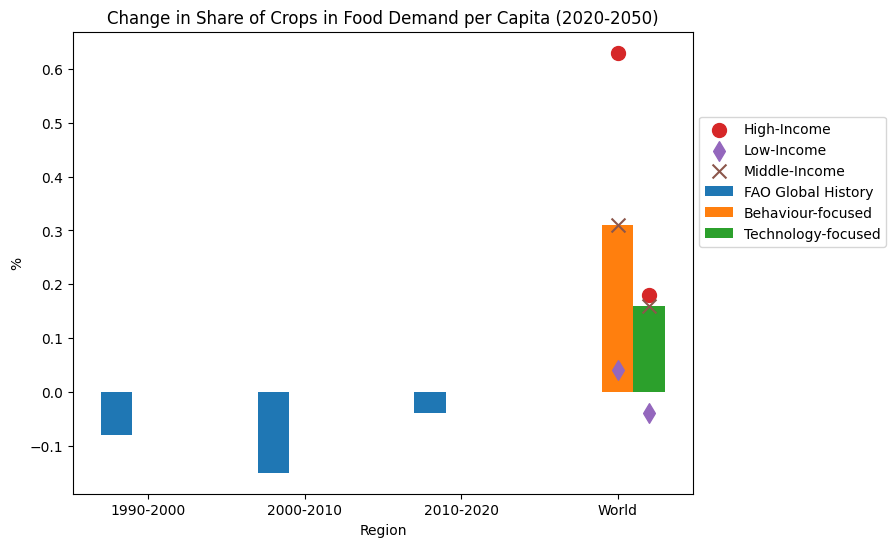

In [13]:
df_food = df_income.copy()
# df_food.aggregate('Food Demand', append=True)
df_test = df_food.filter(variable='Food Demand|Crops (Share)', scenario=["Behaviour-focused", "Technology-focused"]) # 'Current Trends',
df_2010 = df_test.filter(year=2010).timeseries()[2010]
df_2020 = df_test.filter(year=2020).timeseries()[2020]
df_2050 = df_test.filter(year=2050).timeseries()[2050]

# Divide the value of CO2 emissions in 2020 by that in 2010
df_result = round(((df_2050/df_2020)**(1/30)-1)*100, ndigits=2)
df_result = df_result.reset_index()
df_result.unit = '%'


df_result = pd.concat([df_result, pd.DataFrame.from_dict(fao_hist_data)])

df_result_bar = df_result[~df_result['region'].isin(['High-Income','Middle-Income','Low-Income'])]
df_result_markers = df_result[df_result['region'].isin(['High-Income','Middle-Income','Low-Income'])]

# Pivot the DataFrame to have regions as index, scenarios as columns, and '0' as values
df_pivot = df_result_bar.pivot(index='region', columns='scenario', values=0)
# df_pivot = df.pivot(index='region', columns='scenario', values='0')

# Create a bar plot
fig, ax = plt.subplots(figsize=(8, 6))

# Define bar width
bar_width = 0.2

# Define x-axis positions for regions
x = np.arange(len(df_pivot.index))  # number of regions

# Manually specify the order in which to plot the scenarios
# plot_order = ['Scenario2', 'Scenario1', 'Scenario3']
plot_order = ['FAO Global History', "Behaviour-focused", "Technology-focused"] #'Current Trends', 

for i, scenario in enumerate(plot_order):
    ax.bar(x + i * bar_width, df_pivot[scenario], width=bar_width, label=scenario)

# Add a single marker to the Scenario1 bar for 'World' region with value 5
world_index = df_pivot.index.get_loc('World')  # Get the index of 'World'
# scenario1_offset = 1 * bar_width  # Offset for Scenario1 (first bar group)
scenario_offsets = {
    # 'Current Trends': world_index + 1 * bar_width,
    'Behaviour-focused': world_index + 1 * bar_width,
    'Technology-focused': world_index + 2 * bar_width,
}

# Create a new column 'offset' in the DataFrame by mapping the 'scenario' column to the offsets
df_result_markers['offset'] = df_result_markers['scenario'].map(scenario_offsets)

marker_styles = {
    'High-Income': 'o',  # Circle marker for Region1
    'Low-Income': 'd',     # Square marker for World
    'Middle-Income':'x'
}
for region in df_result_markers['region'].unique():
    # Filter DataFrame by region
    region_data = df_result_markers[df_result_markers['region'] == region]
    
    # Scatter plot for each region with different marker styles
    ax.scatter(region_data['offset'], region_data[0], 
               label=region, marker=marker_styles[region], s=100)

# Add labels, title, and legend
ax.set_xlabel('Region')
ax.set_ylabel('%')

ax.set_title('Change in Share of Crops in Food Demand per Capita (2020-2050)')

# Set x-ticks to be in the middle of the group of bars
ax.set_xticks(x + bar_width * (len(df_pivot.columns) - 1) / 2)
ax.set_xticklabels(df_pivot.index)


fig.legend(bbox_to_anchor=(1.15, 0.75)) 

# Show the plot
plt.show()


# FOOD IMAGE ONLY

In [14]:
df_image_food = pyam.read_iiasa('geo7_internal',
                     variable= ['Food Demand','Food Demand|Crops', 'Population'],
                     scenario=['REF-v2', 'TECH-TP-v2', 'LIFE-TP-v2'],
                     region=regions_chpt_21,
                    model='IMAGE*'
                    )
df_image_food.rename(scenario=scenario_rename_dict, inplace=True)


[INFO] 12:29:19 - ixmp4.conf.settings: Connecting as user 'stephenmaycock'.
[INFO] 12:29:20 - pyam.iiasa: You are connected to the IXSE_GEO7_INTERNAL scenario explorer hosted by IIASA. If you use this data in any published format, please cite the data as provided in the explorer guidelines: https://data.ece.iiasa.ac.at/geo7-internal/#/about
[INFO] 12:29:20 - pyam.iiasa: You are connected as user `stephenmaycock`


In [15]:
df_3_groups_image_food = compute_3_groups_image(df_image_food, ['Food Demand','Food Demand|Crops'], 'Population')
df_3_groups_image_food.divide('Food Demand|Crops', 'Food Demand', 'Food Demand|Crops (Fraction)', append=True, ignore_units=True)
df_3_groups_image_food.multiply('Food Demand|Crops (Fraction)', 100, 'Food Demand|Crops (Share)', append=True, ignore_units='%')
df_3_groups_image_food.filter(variable='Food Demand|Crops (Share)').timeseries()

2005  \
model     scenario           region        variable                  unit              
IMAGE 3.3 Behaviour-focused  High-Income   Food Demand|Crops (Share) %     72.057796   
                             Low-Income    Food Demand|Crops (Share) %     91.485615   
                             Middle-Income Food Demand|Crops (Share) %     81.100339   
                             World         Food Demand|Crops (Share) %     83.193838   
          Current Trends     High-Income   Food Demand|Crops (Share) %     72.057796   
                             Low-Income    Food Demand|Crops (Share) %     91.485615   
                             Middle-Income Food Demand|Crops (Share) %     81.100339   
                             World         Food Demand|Crops (Share) %     83.193838   
          Technology-focused High-Income   Food Demand|Crops (Share) %     72.057796   
                             Low-Income    Food Demand|Crops (Share) %     91.485615   
                             Middle-Income Food Demand|Crops (Share) %     81.100339   
                             World         Food Demand|Crops (Share) %     83.193838   

                                                                                2010  \
model     scenario           region        variable                  unit              
IMAGE 3.3 Behaviour-focused  High-Income   Food Demand|Crops (Share) %     72.568285   
                             Low-Income    Food Demand|Crops (Share) %     90.887704   
                             Middle-Income Food Demand|Crops (Share) %     80.783015   
                             World         Food Demand|Crops (Share) %     83.088726   
          Current Trends     High-Income   Food Demand|Crops (Share) %     72.568285   
                             Low-Income    Food Demand|Crops (Share) %     90.887704   
                             Middle-Income Food Demand|Crops (Share) %     80.783015   
                             World         Food Demand|Crops (Share) %     83.088726   
          Technology-focused High-Income   Food Demand|Crops (Share) %     72.568285   
                             Low-Income    Food Demand|Crops (Share) %     90.887704   
                             Middle-Income Food Demand|Crops (Share) %     80.783015   
                             World         Food Demand|Crops (Share) %     83.088726   

                                                                                2015  \
model     scenario           region        variable                  unit              
IMAGE 3.3 Behaviour-focused  High-Income   Food Demand|Crops (Share) %     72.756336   
                             Low-Income    Food Demand|Crops (Share) %     90.170729   
                             Middle-Income Food Demand|Crops (Share) %     80.922918   
                             World         Food Demand|Crops (Share) %     82.982654   
          Current Trends     High-Income   Food Demand|Crops (Share) %     72.756336   
                             Low-Income    Food Demand|Crops (Share) %     90.170729   
                             Middle-Income Food Demand|Crops (Share) %     80.922918   
                             World         Food Demand|Crops (Share) %     82.982654   
          Technology-focused High-Income   Food Demand|Crops (Share) %     72.756336   
                             Low-Income    Food Demand|Crops (Share) %     90.170729   
                             Middle-Income Food Demand|Crops (Share) %     80.922918   
                             World         Food Demand|Crops (Share) %     82.982654   

                                                                                2020  \
model     scenario           region        variable                  unit              
IMAGE 3.3 Behaviour-focused  High-Income   Food Demand|Crops (Share) %     71.483549   
                             Low-Income    Food Demand|Crops (Share) %     88.830221   
                             

C:\Users\maycocks\AppData\Local\Temp\2\ipykernel_11124\3142949989.py:48: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_result_markers['offset'] = df_result_markers['scenario'].map(scenario_offsets)


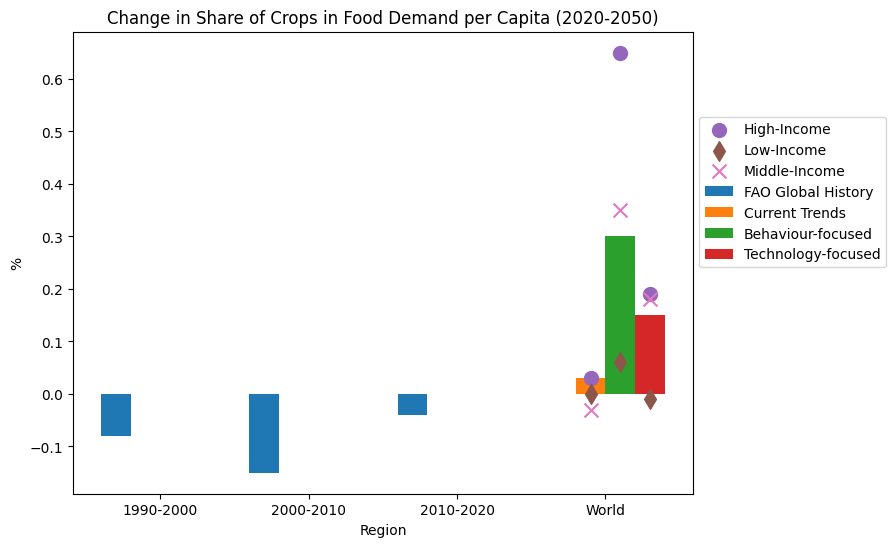

In [16]:
df_test = df_3_groups_image_food.filter(variable='Food Demand|Crops (Share)')
df_2010 = df_test.filter(year=2010).timeseries()[2010]
df_2020 = df_test.filter(year=2020).timeseries()[2020]
df_2050 = df_test.filter(year=2050).timeseries()[2050]

# Divide the value of CO2 emissions in 2020 by that in 2010
df_result = round(((df_2050/df_2020)**(1/30)-1)*100, ndigits=2)
df_result = df_result.reset_index()
df_result.unit = '%'


df_result = pd.concat([df_result, pd.DataFrame.from_dict(fao_hist_data)])
df_result['model'] = 'chpt_21'

df_result_bar = df_result[~df_result['region'].isin(['High-Income','Middle-Income','Low-Income'])]
df_result_markers = df_result[df_result['region'].isin(['High-Income','Middle-Income','Low-Income'])]

# Pivot the DataFrame to have regions as index, scenarios as columns, and '0' as values
df_pivot = df_result_bar.pivot(index='region', columns='scenario', values=0)
# df_pivot = df.pivot(index='region', columns='scenario', values='0')

# Create a bar plot
fig, ax = plt.subplots(figsize=(8, 6))

# Define bar width
bar_width = 0.2

# Define x-axis positions for regions
x = np.arange(len(df_pivot.index))  # number of regions

# Manually specify the order in which to plot the scenarios
# plot_order = ['Scenario2', 'Scenario1', 'Scenario3']
plot_order = ['FAO Global History', 'Current Trends',  "Behaviour-focused", "Technology-focused"] #

for i, scenario in enumerate(plot_order):
    ax.bar(x + i * bar_width, df_pivot[scenario], width=bar_width, label=scenario)

# Add a single marker to the Scenario1 bar for 'World' region with value 5
world_index = df_pivot.index.get_loc('World')  # Get the index of 'World'
# scenario1_offset = 1 * bar_width  # Offset for Scenario1 (first bar group)
scenario_offsets = {
    'Current Trends': world_index + 1 * bar_width,
    'Behaviour-focused': world_index + 2 * bar_width,
    'Technology-focused': world_index + 3 * bar_width,
}

# Create a new column 'offset' in the DataFrame by mapping the 'scenario' column to the offsets
df_result_markers['offset'] = df_result_markers['scenario'].map(scenario_offsets)

marker_styles = {
    'High-Income': 'o',  # Circle marker for Region1
    'Low-Income': 'd',     # Square marker for World
    'Middle-Income':'x'
}
for region in df_result_markers['region'].unique():
    # Filter DataFrame by region
    region_data = df_result_markers[df_result_markers['region'] == region]
    
    # Scatter plot for each region with different marker styles
    ax.scatter(region_data['offset'], region_data[0], 
               label=region, marker=marker_styles[region], s=100)

# Add labels, title, and legend
ax.set_xlabel('Region')
ax.set_ylabel('%')

ax.set_title('Change in Share of Crops in Food Demand per Capita (2020-2050)')

# Set x-ticks to be in the middle of the group of bars
ax.set_xticks(x + bar_width * (len(df_pivot.columns) - 1) / 2)
ax.set_xticklabels(df_pivot.index)


fig.legend(bbox_to_anchor=(1.15, 0.75)) 

# Show the plot
plt.show()

In [17]:
df_result

,model,scenario,region,variable,unit,0
0,chpt_21,Behaviour-focused,High-Income,Food Demand|Crops (Share),%,0.65
1,chpt_21,Behaviour-focused,Low-Income,Food Demand|Crops (Share),%,0.06
2,chpt_21,Behaviour-focused,Middle-Income,Food Demand|Crops (Share),%,0.35
3,chpt_21,Behaviour-focused,World,Food Demand|Crops (Share),%,0.30
4,chpt_21,Current Trends,High-Income,Food Demand|Crops (Share),%,0.03
5,chpt_21,Current Trends,Low-Income,Food Demand|Crops (Share),%,0.00
6,chpt_21,Current Trends,Middle-Income,Food Demand|Crops (Share),%,-0.03
7,chpt_21,Current Trends,World,Food Demand|Crops (Share),%,0.03
8,chpt_21,Technology-focused,High-Income,Food Demand|Crops (Share),%,0.19
9,chpt_21,Technology-focused,Low-Income,Food Demand|Crops (Share),%,-0.01


# Use IMAGE for YIELD baseline

Text(0.5, 1.0, 'Yield increase (2020-2050)')

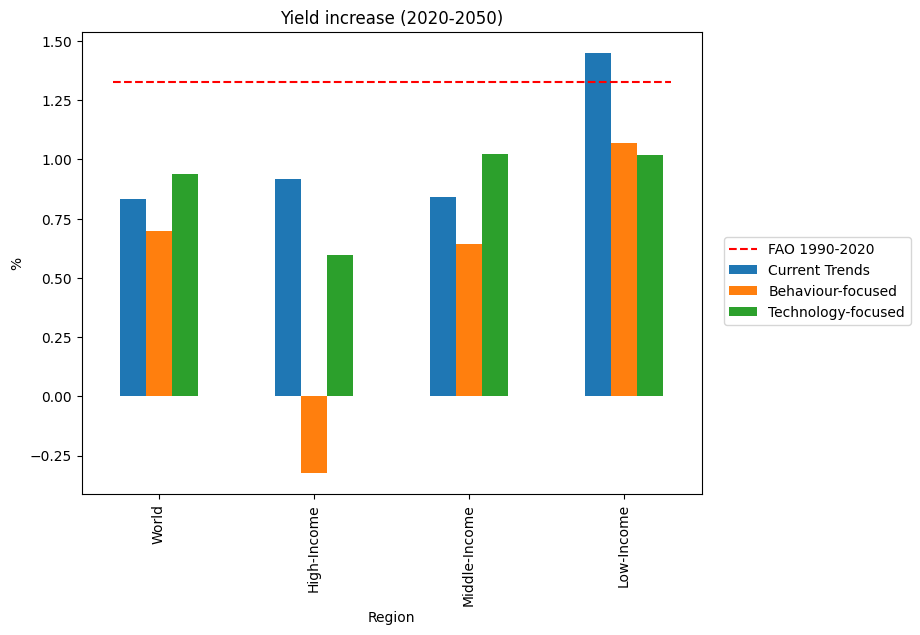

In [18]:
# Yield
df_test = df_income.filter(variable='Yield|Cereal')
df_2020 = df_test.filter(year=2020).timeseries()[2020]
df_2050 = df_test.filter(year=2050).timeseries()[2050]

# Divide the value of CO2 emissions in 2020 by that in 2010
df_result = ((df_2050/df_2020)**(1/30)-1)*100
df_result = df_result.reset_index()
df_result.unit = '%'

# https://ourworldindata.org/explorers/crop-yields?country=~OWID_WRL&hideControls=false&Crop=Cereals&Metric=Actual+yield
# Add FAO historical data
global_yield_increase_2010_2020 = ((4.1/2.76)**(1/30)-1)*100
fao_hist_data = {
    'model':'chpt_21',
    'scenario':'FAO 2010-2020',
    'region':'World',
    'variable':'Yield|Cereal',
    'unit':'%',
    0: global_yield_increase_2010_2020
    }

# df_result = pd.concat([df_result, pd.DataFrame([fao_hist_data])])

acc_result_pyam = pyam.IamDataFrame(df_result)
fig, ax = plt.subplots(figsize=(8,6))
acc_result_pyam.plot.bar(x='region', 
                         bars='scenario', 
                         order=['World', 'High-Income', 'Middle-Income', 'Low-Income',], 
                         bars_order=["Current Trends", "Behaviour-focused", "Technology-focused"],
                         ax=ax,
                         legend=False
                         )

ax.axhline(y=global_yield_increase_2010_2020, xmin=0.05, xmax=0.95, color = 'r', linestyle = '--', label='FAO 1990-2020',)
fig.legend(bbox_to_anchor=(1.17, 0.55)) 
ax.set_title('Yield increase (2020-2050)')

# IMAGE YIELD ONLY

In [19]:
df_image_yield = pyam.read_iiasa('geo7_internal',
                     variable='Yield|Cereal',
                     scenario=['REF-v2', 'TECH-TP-v2', 'LIFE-TP-v2'],
                     region=regions_chpt_21,
                    model='IMAGE*'
                    )
df_image_yield

[INFO] 12:29:24 - pyam.iiasa: You are connected to the IXSE_GEO7_INTERNAL scenario explorer hosted by IIASA. If you use this data in any published format, please cite the data as provided in the explorer guidelines: https://data.ece.iiasa.ac.at/geo7-internal/#/about
[INFO] 12:29:24 - pyam.iiasa: You are connected as user `stephenmaycock`


<class 'pyam.core.IamDataFrame'>
Index:
 * model    : IMAGE 3.3 (1)
 * scenario : LIFE-TP-v2, REF-v2, TECH-TP-v2 (3)
Timeseries data coordinates:
   region   : IMAGE 3.3|Brazil, IMAGE 3.3|Canada, ... World (19)
   variable : Yield|Cereal (1)
   unit     : t DM/ha/yr (1)
   year     : 2005, 2010, 2015, 2020, 2025, 2030, 2035, 2040, ... 2100 (15)
Meta indicators:
   version (int64) 2 (1)

In [21]:
df_not_on_db = pyam.IamDataFrame('../../../data/SOD/model_results/raw/Consolidated_IMAGE_GEO7_R3_results_12022025_0956.xlsx')
df_not_on_db = df_not_on_db.filter(variable='Agricultural Production|Crops|Non-Energy')
df_not_on_db.rename(variable={'Agricultural Production|Crops|Non-Energy':'Agricultural Production|Non-Energy|Crops',
                                        },
                    region={
                        'BRA': 'IMAGE 3.3|Brazil',
                        'CAN': 'IMAGE 3.3|Canada',
                        'CEU': 'IMAGE 3.3|Central Europe',
                        'CHN': 'IMAGE 3.3|China Region',
                        'EAF': 'IMAGE 3.3|Eastern Africa',
                        'INDIA': 'IMAGE 3.3|India',
                        'INDO': 'IMAGE 3.3|Indonesia Region',
                        'JAP': 'IMAGE 3.3|Japan',
                        'KOR': 'IMAGE 3.3|Korea Region',
                        'ME': 'IMAGE 3.3|Middle East',
                        'MEX': 'IMAGE 3.3|Mexico',
                        'NAF': 'IMAGE 3.3|Northern Africa',
                        'OCE': 'IMAGE 3.3|Oceania',
                        'RCAM': 'IMAGE 3.3|Central America',
                        'RSAF': 'IMAGE 3.3|Rest of Southern Africa',
                        'RSAM': 'IMAGE 3.3|Rest of South America',
                        'RSAS': 'IMAGE 3.3|Rest of South Asia',
                        'RUS': 'IMAGE 3.3|Russia Region',
                        'SAF': 'IMAGE 3.3|South Africa',
                        'SEAS': 'IMAGE 3.3|Southeastern Asia',
                        'STAN': 'IMAGE 3.3|Central Asia',
                        'TUR': 'IMAGE 3.3|Turkey',
                        'UKR': 'IMAGE 3.3|Ukraine Region',
                        'USA': 'IMAGE 3.3|USA',
                        'WAF': 'IMAGE 3.3|Western Africa',
                        'WEU': 'IMAGE 3.3|Western Europe'},                    
                    inplace=True)
df_not_on_db = df_not_on_db.filter(region='World', keep=False)
df_not_on_db

[INFO] 12:31:51 - pyam.core: Reading file ..\..\..\data\SOD\model_results\raw\Consolidated_IMAGE_GEO7_R3_results_12022025_0956.xlsx


<class 'pyam.core.IamDataFrame'>
Index:
 * model    : IMAGE 3.3 (1)
 * scenario : LIFE-TP-v2, REF-v2, TECH-TP-v2 (3)
Timeseries data coordinates:
   region   : IMAGE 3.3|Brazil, IMAGE 3.3|Canada, ... IMAGE 3.3|Western Europe (26)
   variable : Agricultural Production|Non-Energy|Crops (1)
   unit     : million t DM/yr (1)
   year     : 2005, 2010, 2015, 2020, 2025, 2030, 2035, 2040, ... 2100 (15)

In [22]:
df_image = pyam.concat([df_image_yield, df_not_on_db])

In [23]:
df_3_groups_image_yield = compute_3_groups_image(df_image, ['Yield|Cereal',], 'Agricultural Production|Non-Energy|Crops')

df_3_groups_image_yield.rename(scenario=scenario_rename_dict, inplace=True)
df_3_groups_image_yield.timeseries()

2005  \
model     scenario           region        variable     unit                   
IMAGE 3.3 Behaviour-focused  High-Income   Yield|Cereal t DM/ha/yr  5.004931   
                             Low-Income    Yield|Cereal t DM/ha/yr  1.883665   
                             Middle-Income Yield|Cereal t DM/ha/yr  3.669508   
                             World         Yield|Cereal t DM/ha/yr  2.884580   
          Current Trends     High-Income   Yield|Cereal t DM/ha/yr  5.005063   
                             Low-Income    Yield|Cereal t DM/ha/yr  1.884504   
                             Middle-Income Yield|Cereal t DM/ha/yr  3.670499   
                             World         Yield|Cereal t DM/ha/yr  2.884933   
          Technology-focused High-Income   Yield|Cereal t DM/ha/yr  5.004904   
                             Low-Income    Yield|Cereal t DM/ha/yr  1.883701   
                             Middle-Income Yield|Cereal t DM/ha/yr  3.669507   
                             World         Yield|Cereal t DM/ha/yr  2.884633   

                                                                        2010  \
model     scenario           region        variable     unit                   
IMAGE 3.3 Behaviour-focused  High-Income   Yield|Cereal t DM/ha/yr  5.197306   
                             Low-Income    Yield|Cereal t DM/ha/yr  2.100273   
                             Middle-Income Yield|Cereal t DM/ha/yr  4.102946   
                             World         Yield|Cereal t DM/ha/yr  3.146467   
          Current Trends     High-Income   Yield|Cereal t DM/ha/yr  5.198637   
                             Low-Income    Yield|Cereal t DM/ha/yr  2.101299   
                             Middle-Income Yield|Cereal t DM/ha/yr  4.105247   
                             World         Yield|Cereal t DM/ha/yr  3.147474   
          Technology-focused High-Income   Yield|Cereal t DM/ha/yr  5.197561   
                             Low-Income    Yield|Cereal t DM/ha/yr  2.100263   
                             Middle-Income Yield|Cereal t DM/ha/yr  4.102866   
                             World         Yield|Cereal t DM/ha/yr  3.146479   

                                                                        2015  \
model     scenario           region        variable     unit                   
IMAGE 3.3 Behaviour-focused  High-Income   Yield|Cereal t DM/ha/yr  5.880990   
                             Low-Income    Yield|Cereal t DM/ha/yr  2.229487   
                             Middle-Income Yield|Cereal t DM/ha/yr  4.468242   
                             World         Yield|Cereal t DM/ha/yr  3.459268   
          Current Trends     High-Income   Yield|Cereal t DM/ha/yr  5.882280   
                             Low-Income    Yield|Cereal t DM/ha/yr  2.230602   
                             Middle-Income Yield|Cereal t DM/ha/yr  4.469931   
                             World         Yield|Cereal t DM/ha/yr  3.460673   
          Technology-focused High-Income   Yield|Cereal t DM/ha/yr  5.881000   
                             Low-Income    Yield|Cereal t DM/ha/yr  2.229525   
                             Middle-Income Yield|Cereal t DM/ha/yr  4.468366   
                             World         Yield|Cereal t DM/ha/yr  3.459277   

                                                                        2020  \
model     scenario           region        variable     unit                   
IMAGE 3.3 Behaviour-focused  High-Income   Yield|Cereal t DM/ha/yr  5.940186   
                             Low-Income    Yield|Cereal t DM/ha/yr  2.498179   
                             Middle-Income Yield|Cereal t DM/ha/yr  4.766876   
                             World         Yield|Cereal t DM/ha/yr  3.613270   
          Current Trends     High-Income   Yield|Cereal t DM/ha/yr  5.940647   
                             Low-Income    Yield|Cereal t DM/ha/yr  2.499137   
                             Middle-Income Yield|Cereal t DM/ha/yr  4

# Absolute Increase

In [24]:
df_test = df_3_groups_image_yield.rename(scenario=scenario_rename_dict)
df_2020 = df_test.filter(year=2020).timeseries()[2020]
df_2030 = df_test.filter(year=2030).timeseries()[2030]
df_2030 = df_test.filter(year=2040).timeseries()[2040]
df_2050 = df_test.filter(year=2050).timeseries()[2050]

# Divide the value of CO2 emissions in 2020 by that in 2010
df_result_2020_2030 = df_2030 - df_2020
df_result_2020_2030 = df_result_2020_2030.reset_index()
df_result_2020_2030.unit = 't DM/ha/yr'
df_result_2020_2030.region = df_result_2020_2030.region.replace({'World':'2020-2030'})
df_result_2020_2030['range'] = '2020-2030'
df_result_2020_2030

,model,scenario,region,variable,unit,0,range
0,IMAGE 3.3,Behaviour-focused,High-Income,Yield|Cereal,t DM/ha/yr,0.112432,2020-2030
1,IMAGE 3.3,Behaviour-focused,Low-Income,Yield|Cereal,t DM/ha/yr,0.608455,2020-2030
2,IMAGE 3.3,Behaviour-focused,Middle-Income,Yield|Cereal,t DM/ha/yr,0.841142,2020-2030
3,IMAGE 3.3,Behaviour-focused,2020-2030,Yield|Cereal,t DM/ha/yr,0.715669,2020-2030
4,IMAGE 3.3,Current Trends,High-Income,Yield|Cereal,t DM/ha/yr,0.681555,2020-2030
5,IMAGE 3.3,Current Trends,Low-Income,Yield|Cereal,t DM/ha/yr,0.397038,2020-2030
6,IMAGE 3.3,Current Trends,Middle-Income,Yield|Cereal,t DM/ha/yr,0.827080,2020-2030
7,IMAGE 3.3,Current Trends,2020-2030,Yield|Cereal,t DM/ha/yr,0.460099,2020-2030
8,IMAGE 3.3,Technology-focused,High-Income,Yield|Cereal,t DM/ha/yr,0.679433,2020-2030
9,IMAGE 3.3,Technology-focused,Low-Income,Yield|Cereal,t DM/ha/yr,0.603772,2020-2030


In [25]:
df_change = df_test.filter(year=[2020, 2030, 2040, 2050]).diff({'Yield|Cereal':'Yield|Cereal'}).data
df_change.year = df_change.year.replace({
    2030:'2020-2030',
    2040:'2030-2040',
    2050:'2040-2050',
})
df_change.loc[df_change['region'] == 'World', 'region'] = df_change['year']
df_change['model'] = 'chpt_21'
df_change

,model,scenario,region,variable,unit,year,value
0,chpt_21,Behaviour-focused,High-Income,Yield|Cereal,t DM/ha/yr,2020-2030,0.151230
1,chpt_21,Behaviour-focused,High-Income,Yield|Cereal,t DM/ha/yr,2030-2040,-0.038797
2,chpt_21,Behaviour-focused,High-Income,Yield|Cereal,t DM/ha/yr,2040-2050,-0.770663
3,chpt_21,Behaviour-focused,Low-Income,Yield|Cereal,t DM/ha/yr,2020-2030,0.295665
4,chpt_21,Behaviour-focused,Low-Income,Yield|Cereal,t DM/ha/yr,2030-2040,0.312790
5,chpt_21,Behaviour-focused,Low-Income,Yield|Cereal,t DM/ha/yr,2040-2050,0.299424
6,chpt_21,Behaviour-focused,Middle-Income,Yield|Cereal,t DM/ha/yr,2020-2030,0.502815
7,chpt_21,Behaviour-focused,Middle-Income,Yield|Cereal,t DM/ha/yr,2030-2040,0.338327
8,chpt_21,Behaviour-focused,Middle-Income,Yield|Cereal,t DM/ha/yr,2040-2050,0.143991
9,chpt_21,Behaviour-focused,2020-2030,Yield|Cereal,t DM/ha/yr,2020-2030,0.347753


C:\Users\maycocks\AppData\Local\Temp\2\ipykernel_11124\1554733885.py:58: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_result_markers_year['offset'] = df_result_markers_year['scenario'].map(scenario_offsets)
C:\Users\maycocks\AppData\Local\Temp\2\ipykernel_11124\1554733885.py:58: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_result_markers_year['offset'] = df_result_markers_year['scenario'].map(scenario_offsets)
C:\Users\maycocks\AppData\Local\Temp\2\ipykernel_11124\1554733885.py:58: SettingWithCopyWa

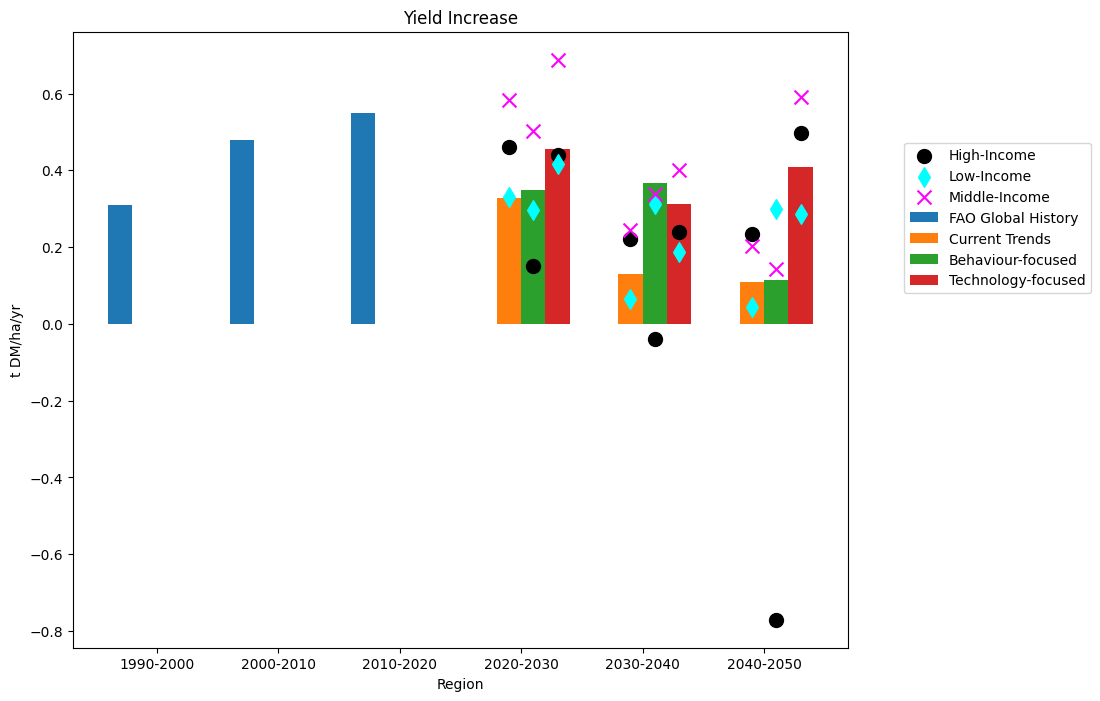

In [26]:
# https://www.fao.org/faostat/en/#data/FBSH Food Balances (-2013, old methodology and population)
yield_total_1990 = 2.76
yield_total_2000 = 3.07
yield_total_2010 = 3.55
yield_total_2020 = 4.10

yield_1990_2000  = yield_total_2000 - yield_total_1990
yield_2000_2010  = yield_total_2010 - yield_total_2000
yield_2010_2020  = yield_total_2020 - yield_total_2010

fao_hist_data = {
    'model':['chpt_21','chpt_21','chpt_21',],
    'scenario':['FAO Global History', 'FAO Global History', 'FAO Global History',],
    'region':['1990-2000','2000-2010','2010-2020',],
    'variable':['Yield|Cereal','Yield|Cereal','Yield|Cereal',],
    'unit':['t DM/ha/yr','t DM/ha/yr','t DM/ha/yr',],
    'value':[yield_1990_2000, yield_2000_2010, yield_2010_2020]
    }

df_result = pd.concat([df_change, pd.DataFrame.from_dict(fao_hist_data)])
df_result_bar = df_result[~df_result['region'].isin(['High-Income','Middle-Income','Low-Income'])]
df_result_markers = df_result[df_result['region'].isin(['High-Income','Middle-Income','Low-Income'])]
df_result_bar

# Pivot the DataFrame to have regions as index, scenarios as columns, and '0' as values
df_pivot = df_result_bar.pivot(index='region', columns='scenario', values='value')
# df_pivot = df.pivot(index='region', columns='scenario', values='0')

# Create a bar plot
fig, ax = plt.subplots(figsize=(10, 8))

# Define bar width
bar_width = 0.2

# Define x-axis positions for regions
x = np.arange(len(df_pivot.index))  # number of regions

# Manually specify the order in which to plot the scenarios
# plot_order = ['Scenario2', 'Scenario1', 'Scenario3']
plot_order = ['FAO Global History', 'Current Trends', "Behaviour-focused", "Technology-focused"] #

for i, scenario in enumerate(plot_order):
    ax.bar(x + i * bar_width, df_pivot[scenario], width=bar_width, label=scenario)

for year in ['2020-2030', '2030-2040','2040-2050']:

    df_result_markers_year = df_result_markers[df_result_markers['year'] == year]
    # Add a single marker to the Scenario1 bar for 'World' region with value 5
    year_index = df_pivot.index.get_loc(year)  # Get the index of 'World'
    # scenario1_offset = 1 * bar_width  # Offset for Scenario1 (first bar group)
    scenario_offsets = {
        'Current Trends': year_index + 1 * bar_width,
        'Behaviour-focused': year_index + 2 * bar_width,
        'Technology-focused': year_index + 3 * bar_width,
    }

    # Create a new column 'offset' in the DataFrame by mapping the 'scenario' column to the offsets
    df_result_markers_year['offset'] = df_result_markers_year['scenario'].map(scenario_offsets)

    marker_styles = {
        'High-Income': 'o',  # Circle marker for Region1
        'Low-Income': 'd',     # Square marker for World
        'Middle-Income':'x'
    }

    color_styles = {
        'High-Income': 'black',  # Circle marker for Region1
        'Low-Income': 'cyan',     # Square marker for World
        'Middle-Income':'magenta'
    }

    for region in df_result_markers_year['region'].unique():
        # Filter DataFrame by region
        region_data = df_result_markers_year[df_result_markers_year['region'] == region]
        
        # Scatter plot for each region with different marker styles
        ax.scatter(region_data['offset'], region_data['value'], 
                label=region, marker=marker_styles[region], c=color_styles[region], s=100)

# Add labels, title, and legend
ax.set_xlabel('Region')
ax.set_ylabel('t DM/ha/yr')

ax.set_title('Yield Increase')

# Set x-ticks to be in the middle of the group of bars
ax.set_xticks(x + bar_width * (len(df_pivot.columns) - 1) / 2)
ax.set_xticklabels(df_pivot.index)

handles, labels = ax.get_legend_handles_labels()
fig.legend(handles[6:], labels[6:], bbox_to_anchor=(1.15, 0.75)) 

# Show the plot
plt.show()

In [27]:
df_result

,model,scenario,region,variable,unit,year,value
0,chpt_21,Behaviour-focused,High-Income,Yield|Cereal,t DM/ha/yr,2020-2030,0.151230
1,chpt_21,Behaviour-focused,High-Income,Yield|Cereal,t DM/ha/yr,2030-2040,-0.038797
2,chpt_21,Behaviour-focused,High-Income,Yield|Cereal,t DM/ha/yr,2040-2050,-0.770663
3,chpt_21,Behaviour-focused,Low-Income,Yield|Cereal,t DM/ha/yr,2020-2030,0.295665
4,chpt_21,Behaviour-focused,Low-Income,Yield|Cereal,t DM/ha/yr,2030-2040,0.312790
5,chpt_21,Behaviour-focused,Low-Income,Yield|Cereal,t DM/ha/yr,2040-2050,0.299424
6,chpt_21,Behaviour-focused,Middle-Income,Yield|Cereal,t DM/ha/yr,2020-2030,0.502815
7,chpt_21,Behaviour-focused,Middle-Income,Yield|Cereal,t DM/ha/yr,2030-2040,0.338327
8,chpt_21,Behaviour-focused,Middle-Income,Yield|Cereal,t DM/ha/yr,2040-2050,0.143991
9,chpt_21,Behaviour-focused,2020-2030,Yield|Cereal,t DM/ha/yr,2020-2030,0.347753


# Percental Increase

C:\Users\maycocks\AppData\Local\Temp\2\ipykernel_11124\1880251072.py:64: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_result_markers['offset'] = df_result_markers['scenario'].map(scenario_offsets)


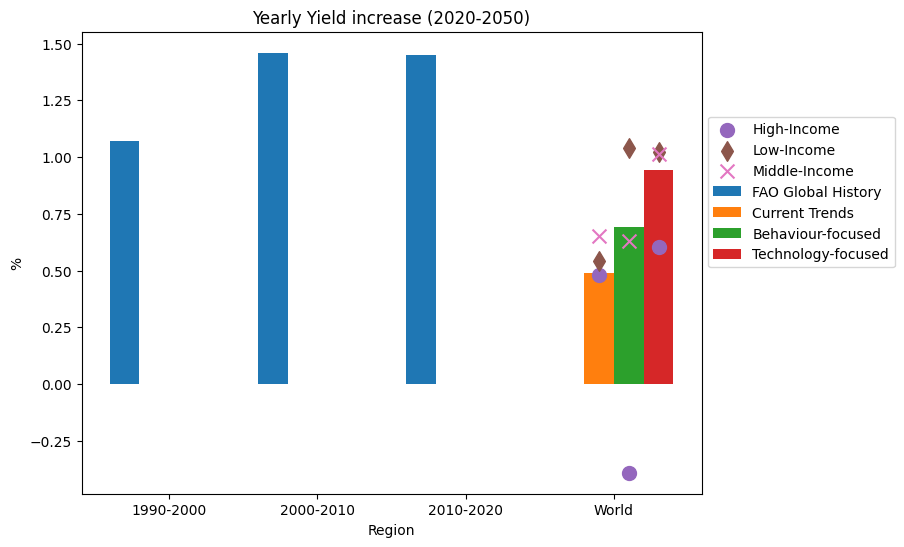

In [28]:
df_test = df_3_groups_image_yield.rename(scenario=scenario_rename_dict)
df_2020 = df_test.filter(year=2020).timeseries()[2020]
df_2050 = df_test.filter(year=2050).timeseries()[2050]

# Divide the value of CO2 emissions in 2020 by that in 2010
df_result = ((df_2050/df_2020)**(1/30)-1)*100
df_result = df_result.reset_index()
df_result.unit = '%'

# https://www.fao.org/faostat/en/#data/FBSH Food Balances (-2013, old methodology and population)
yield_total_1990 = 2.76
yield_total_2000 = 3.07
yield_total_2010 = 3.55
yield_total_2020 = 4.10

yield_1990_2000  = round(((yield_total_2000/yield_total_1990)**(1/10)-1)*100, ndigits=2)
yield_2000_2010  = round(((yield_total_2010/yield_total_2000)**(1/10)-1)*100, ndigits=2)
yield_2010_2020  = round(((yield_total_2020/yield_total_2010)**(1/10)-1)*100, ndigits=2)

fao_hist_data = {
    'model':['chpt_21','chpt_21','chpt_21',],
    'scenario':['FAO Global History', 'FAO Global History', 'FAO Global History',],
    'region':['1990-2000','2000-2010','2010-2020',],
    'variable':['Yield|Cereal','Yield|Cereal','Yield|Cereal',],
    'unit':['%','%','%',],
    0:[yield_1990_2000, yield_2000_2010, yield_2010_2020]
    }


df_result = pd.concat([df_result, pd.DataFrame.from_dict(fao_hist_data)])
df_result_bar = df_result[~df_result['region'].isin(['High-Income','Middle-Income','Low-Income'])]
df_result_markers = df_result[df_result['region'].isin(['High-Income','Middle-Income','Low-Income'])]

# Pivot the DataFrame to have regions as index, scenarios as columns, and '0' as values
df_pivot = df_result_bar.pivot(index='region', columns='scenario', values=0)
# df_pivot = df.pivot(index='region', columns='scenario', values='0')

# Create a bar plot
fig, ax = plt.subplots(figsize=(8, 6))

# Define bar width
bar_width = 0.2

# Define x-axis positions for regions
x = np.arange(len(df_pivot.index))  # number of regions

# Manually specify the order in which to plot the scenarios
# plot_order = ['Scenario2', 'Scenario1', 'Scenario3']
plot_order = ['FAO Global History', 'Current Trends', "Behaviour-focused", "Technology-focused"] #

for i, scenario in enumerate(plot_order):
    ax.bar(x + i * bar_width, df_pivot[scenario], width=bar_width, label=scenario)

# Add a single marker to the Scenario1 bar for 'World' region with value 5
world_index = df_pivot.index.get_loc('World')  # Get the index of 'World'
# scenario1_offset = 1 * bar_width  # Offset for Scenario1 (first bar group)
scenario_offsets = {
    'Current Trends': world_index + 1 * bar_width,
    'Behaviour-focused': world_index + 2 * bar_width,
    'Technology-focused': world_index + 3 * bar_width,
}

# Create a new column 'offset' in the DataFrame by mapping the 'scenario' column to the offsets
df_result_markers['offset'] = df_result_markers['scenario'].map(scenario_offsets)

marker_styles = {
    'High-Income': 'o',  # Circle marker for Region1
    'Low-Income': 'd',     # Square marker for World
    'Middle-Income':'x'
}
for region in df_result_markers['region'].unique():
    # Filter DataFrame by region
    region_data = df_result_markers[df_result_markers['region'] == region]
    
    # Scatter plot for each region with different marker styles
    ax.scatter(region_data['offset'], region_data[0], 
               label=region, marker=marker_styles[region], s=100)

# Add labels, title, and legend
ax.set_xlabel('Region')
ax.set_ylabel('%')

ax.set_title('Yearly Yield increase (2020-2050)')

# Set x-ticks to be in the middle of the group of bars
ax.set_xticks(x + bar_width * (len(df_pivot.columns) - 1) / 2)
ax.set_xticklabels(df_pivot.index)


fig.legend(bbox_to_anchor=(1.15, 0.75)) 

# Show the plot
plt.show()

ValueError: Can not plot multiple models in bar plot with x=region, bars=scenario

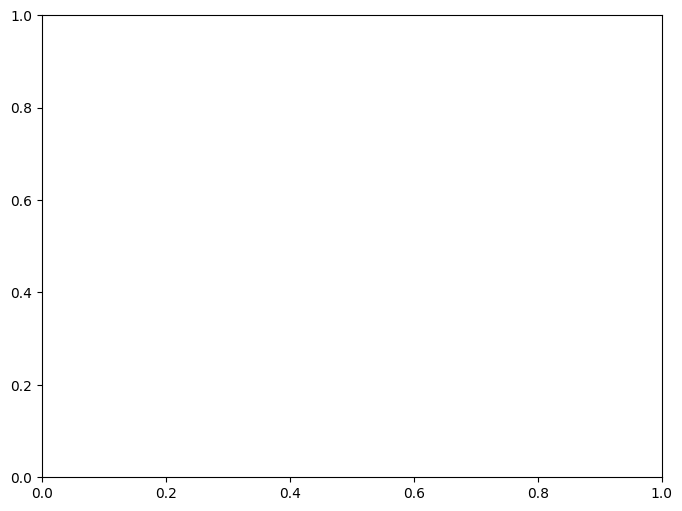

In [29]:
acc_result_pyam = pyam.IamDataFrame(df_result)
fig, ax = plt.subplots(figsize=(8,6))
acc_result_pyam.plot.bar(x='region', 
                         bars='scenario', 
                         order=['World', 'High-Income', 'Middle-Income', 'Low-Income',], 
                         bars_order=["Current Trends", "Behaviour-focused", "Technology-focused"],
                         ax=ax,
                         legend=False
                         )

ax.axhline(y=global_yield_increase_2010_2020, xmin=0.05, xmax=0.95, color = 'r', linestyle = '--', label='FAO 1990-2020',)
fig.legend(bbox_to_anchor=(1.17, 0.55)) 
ax.set_title('Yield increase (2020-2050)')